# Univariate Statistics 

Process of analyzing data sets to summarize their characteristics using a combination of statistical calculations and data visualization. Understand the relationship among the data including the shape and spread of the data and the validity to use it for predictive algorithms.


**univariate** means "one variable" and it ignores any sort of relationhip with other variables. 


There are three types of univariate statistics that we are interested in for each variable

* General Information  (data type, count of total values, number of unique variables)

* Range and middle (min,max,mean,median,mode, quartiles)

* Normality and spread (standard deviation, skewness, kurtosis)



## Normality 

One of the primary purposes of univariate analysis is to measure the degree of "normality" in each feature's distribution. 

Many of the analysis depend on that our distribution data is a *normal distribution* (Gaussian). It's one of the few types of propability distributions that are stable and that can be expressed by analytical functions.

The closer a variable's distribution represents a normal distribution, the more reliably it can be used in predictive data analytics 




## Example

In [1]:
# https://www.kaggle.com/mirichoi0218/insurance
import pandas as pd 
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We want to know how much the factors explain or relate to "charges"

### Stat General Info

In [2]:
df.describe() # Stats Info for our numerical values 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Unique values 

In [3]:

for feature in df.columns.values:
  print(f'{feature}: {df[feature].nunique()}')

age: 47
sex: 2
bmi: 548
children: 6
smoker: 2
region: 4
charges: 1337


#### Data Types

In [4]:

for feature in df.columns.values:
  print(f'{feature}: {df[feature].dtype}')

age: int64
sex: object
bmi: float64
children: int64
smoker: object
region: object
charges: float64


#### Missing Data (null)

In [5]:
for feature in df.columns.values:
  print(f'{feature}: {df[feature].isnull().sum()}')

age: 0
sex: 0
bmi: 0
children: 0
smoker: 0
region: 0
charges: 0


## Boundaries and Middle

### Quartiles
Quartiles represent "inner" boundaries among "quarters" of the dataset.

In [6]:
#numpy example
import numpy as np 
my_list = [1,2,3,4,5,6,7,8,9]
print(np.quantile(my_list,0.25))
print(np.quantile(my_list,0.50))
print(np.quantile(my_list,0.75))

3.0
5.0
7.0


### Example


In [7]:
import pandas as pd 
print(df.charges.count())
print(df.charges.min())
print(df.charges.max())
print(df.charges.quantile(0.25))
print(df.charges.quantile(0.50))
print(df.charges.mean())
print(df.charges.median())
print(df.charges.mode().values)

1338
1121.8739
63770.42801
4740.28715
9382.033
13270.422265141257
9382.033
[1639.5631]


## Spread: Standard Deviation

A standard deviation $σ$ tell us how spread out the data is from the mean

It is not a measure of normality. It marks the ranges at which the dataset would represent a normal distribution

* $σ = 1$ (68.2 %)
* $σ = 2$ (95.4 %)
* $σ = 3$ (99.8 %)




---



Formule adjusted for samples:


$\sigma = \sqrt{ \frac{1}{N-1}} \sum_{i = 1}^N (x_i - \bar{x})^2$

### Example

In [8]:
df.charges.std()

12110.011236693994

In [9]:
np.std(df.charges) #numpy by default assumes it is a population

12105.484975561605

In [10]:
np.std(df.charges,ddof = 1)

12110.011236693994

## (Ab)Normality: Skew, Kurt

* Skewness measures how much the bulk of the histogram data is skewed to the right or left of the x-axis

     * Rule of thumb [-1,1] is ok
     * There are math transformation to fix it 

* kurtosis measures how high or low the peak of the data is



When we are working with samples and not the whole population, **a bias correction** needs to be made. By default **scipy** assumes population


### Example

In [11]:
from scipy.stats import kurtosis,skew
print(skew(df.charges,bias = False)) # to assume sample
print(kurtosis(df.charges,bias = False))

1.5158796580240383
1.6062986532967916


In [12]:
print(df.charges.skew())
print(df.charges.kurt())

1.5158796580240388
1.6062986532967907


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


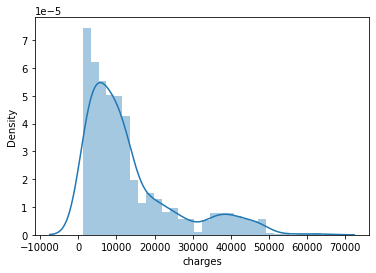

In [13]:
import seaborn as sns
sns.distplot(df.charges);